# Rule 1 - Web Scraping - Part 1
***

If you're following the Advice of either of Phil Town's books: [Rule #1 Investing](https://www.amazon.com/Rule-Strategy-Successful-Investing-Minutes/dp/0307336840) or [Payback Time](https://www.amazon.com/Payback-Time-Making-Money-Revenge/dp/0307461866/) you'll want to save some time with the number and analysis.

In short we'll make use of a few modules, some for HTTP requests, some for the HTML parsing and some for the data analysis.

Firstly we'll need some data sources, __Market Web__ has 5 years of free data and most of what we need. __Gurufocus__ has the rest.

# Setup

We'll need to [requests module](http://docs.python-requests.org/en/master/) to make HTTP requests and [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/) to parse the HTML tree we retrieve. 


In [46]:
import requests

In [47]:
from bs4 import BeautifulSoup as bsoup

# Retrieve the HTML via requests module

We can make a simple HTTP GET request easily with the request module:

In [13]:
url ="http://www.marketwatch.com/investing/stock/goog/financials/"

In [14]:
r = requests.get(url,timeout=10)

Let's see how we did:

In [16]:
r

<Response [200]>

In [26]:
r.status_code

200

We've got our request object __r__ telling us __200__ (OK). Great.

# Find the Data you Seek

Now that we captured the __HTML__, we'll need to see how are we going to get the data we want. 

Let's review the HTML of the __market web__ page. Let's try to get the **Revenue** of the last 5 years:

In [34]:
from IPython.display import Image

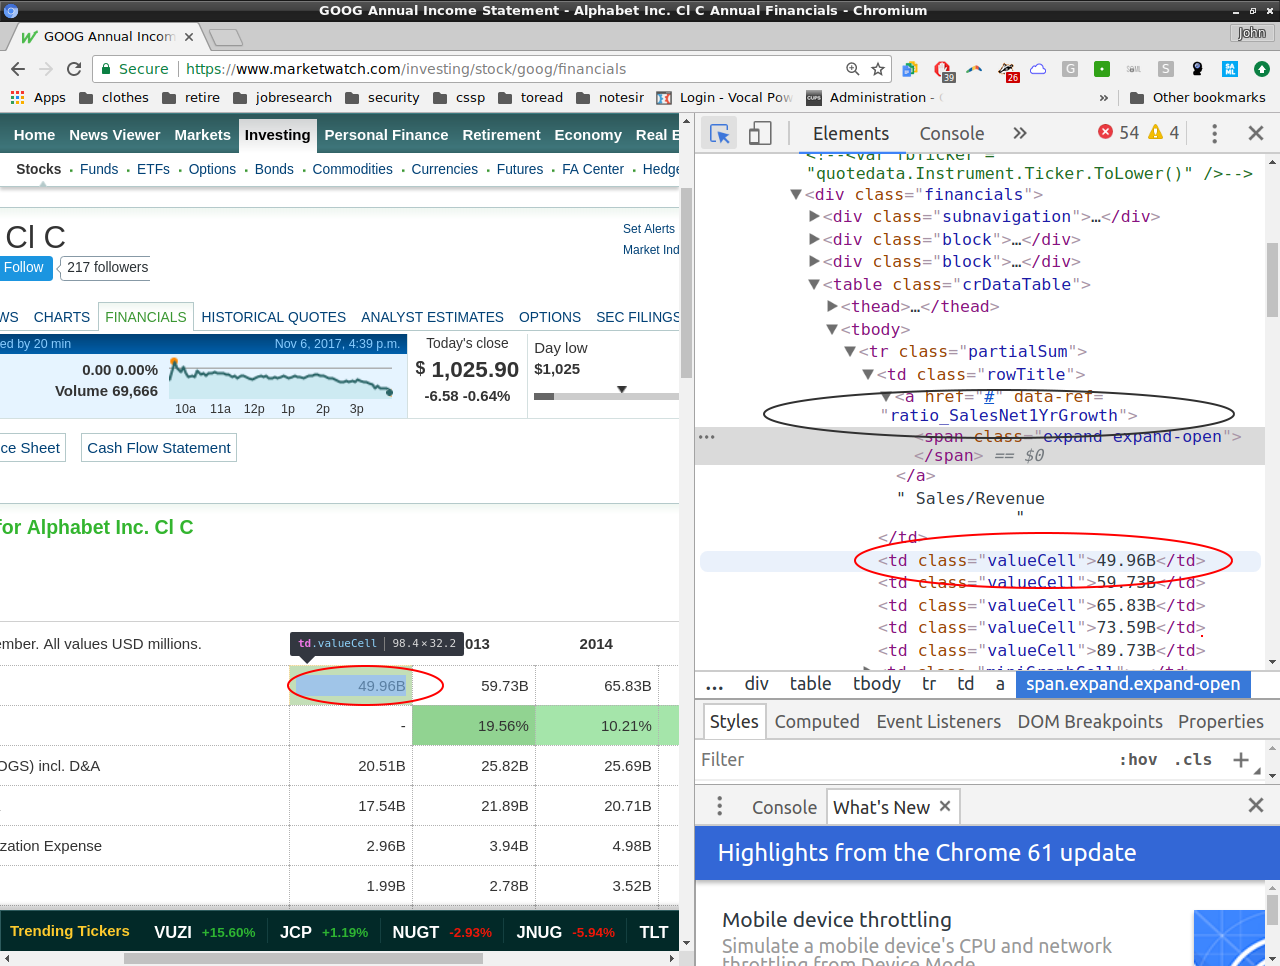

In [35]:
Image(filename='md1.png')

We see the first __Revenue__ data point in red using [Chrome Dev Tools](https://developer.chrome.com/devtools) - just hit F12. It's inside a __td__ cell. If we go up the tree we also see an anchor link with __ratio_SalesNet1YrGrowth__ as an __attribute__. It's better to be *__**specific**__* in your anchoring than general. It's easier to remember the structure and lends for better variable names. How do we get at the data?

# Parse the HTML with Beautiful Soup

First, we create a soup object using the request objects content:

In [25]:
soup = bsoup(r.content,"lxml")

We'll use the __find__ call and look for __'a'__ and the value __'ratio_SalesNet1YrGrowth'__ for the __attribute__ __data-ref__. We pass the latter parameters as a __dictionary__:

In [36]:
a_href_sales = soup.find('a',attrs={'data-ref':'ratio_SalesNet1YrGrowth'})

In [37]:
a_href_sales

<a data-ref="ratio_SalesNet1YrGrowth" href="#"><span class="expand"></span></a>

Got it!

a_href_sales is a *__**child**__* of another __td__. The data we want are all *__**siblings**__* to that parent *td* (of a_href_sales). Therefore we capture them as:

In [59]:
sales_td_parent = a_href_sales.find_parent()
#Move up the tree to the parent


In [61]:
sales_data_links = sales_td_parent.find_next_siblings("td",attrs={'class':'valueCell'})
#Find the next tags that are part of the same html structure.

In [54]:
sales_data_links

[<td class="valueCell">49.96B</td>,
 <td class="valueCell">59.73B</td>,
 <td class="valueCell">65.83B</td>,
 <td class="valueCell">73.59B</td>,
 <td class="valueCell">89.73B</td>]

Got 'em!

What type are these? 


In [55]:
for link in sales_data_links:
                     print (type (link))

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>


bs4.element.Tag's' have a .text attribute that simply yields the text of the tag:

In [52]:
for link in sales_data_links:
                     print (link.text)
        

49.96B
59.73B
65.83B
73.59B
89.73B


In [43]:
revenue=[]
for link in sales_data_links:
    revenue.append(link.text)

In [44]:
revenue

['49.96B', '59.73B', '65.83B', '73.59B', '89.73B']

All this data is belong to us! (Evil grins and laughter!!)

In the next lesson we'll add some **error checking** and build up some more **strategy** for **our [project](https://github.com/modulusmath/Finance/blob/master/market_sales.py).**